# Q2) Consider only the below columns and prepare a prediction model for predicting Price.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# Reading the csv file
df=pd.read_csv('ToyotaCorolla.csv', encoding='latin-1')
# here latin-1 is used because of some different characters
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


# EDA

In [4]:
df.shape

(1436, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
df.describe() # gives the statistical values

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
df.corr() # to find correlation between the columns

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [9]:
# As we can see that id is just a notation which doesn't effect anything
# Model is also object type model name only
# Age is given so mfg month and dates are not relevent anymore
# similarly cylinders,  Mfr_Guarantee, BOVAG_Guarantee ,Guarantee_Period,ABS,Airbag_1, Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows, Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette and Tow_Bar are not so relevent in our calculation.
# so we would drop these all these columns so taking only useful columns

In [10]:
# using the useful columns only
df=df[['Price', 'Age_08_04','KM','Fuel_Type', 'HP', 'Met_Color','Automatic', 'cc', 'Doors','Gears', 'Quarterly_Tax', 'Weight']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          1436 non-null   int64 
 1   Age_08_04      1436 non-null   int64 
 2   KM             1436 non-null   int64 
 3   Fuel_Type      1436 non-null   object
 4   HP             1436 non-null   int64 
 5   Met_Color      1436 non-null   int64 
 6   Automatic      1436 non-null   int64 
 7   cc             1436 non-null   int64 
 8   Doors          1436 non-null   int64 
 9   Gears          1436 non-null   int64 
 10  Quarterly_Tax  1436 non-null   int64 
 11  Weight         1436 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 134.8+ KB


In [11]:
# we can see that fuel type is object type so using dummies to make it useful
df_dumm=pd.get_dummies(df['Fuel_Type'])
# Concatenate the encoded columns with the original DataFrame
df= pd.concat([df,df_dumm], axis=1)
df=df.drop(['Fuel_Type'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   Met_Color      1436 non-null   int64
 5   Automatic      1436 non-null   int64
 6   cc             1436 non-null   int64
 7   Doors          1436 non-null   int64
 8   Gears          1436 non-null   int64
 9   Quarterly_Tax  1436 non-null   int64
 10  Weight         1436 non-null   int64
 11  CNG            1436 non-null   uint8
 12  Diesel         1436 non-null   uint8
 13  Petrol         1436 non-null   uint8
dtypes: int64(11), uint8(3)
memory usage: 127.7 KB


In [12]:
# now again seeing correlation
df.corr()

,Price,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,CNG,Diesel,Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,0.063104,0.219197,0.581198,-0.039536,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,0.015023,0.278165,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,0.209477,-0.298432,0.089614,0.062109,-0.533453,0.489110
Met_Color,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,0.018601,0.011326,0.057929,0.021009,-0.012420,0.004872
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,-0.098555,-0.055371,0.057249,0.001486,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,0.014629,0.306996,0.335637,0.005941,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,-0.160141,0.109363,0.302618,0.009680,0.025495,-0.027589
Gears,0.063104,-0.005364,0.015023,0.209477,0.018601,-0.098555,0.014629,-0.160141,1.000000,-0.005452,0.020613,-0.049537,-0.048847,0.063182
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.011326,-0.055371,0.306996,0.109363,-0.005452,1.000000,0.626134,0.233791,0.792726,-0.835452


In [13]:
# as we can see here petrol and disel are highly corelated so we would drop an one of them
# similarly Quarterly tax also highly correlated with disel and petrl so we would drop quarterly tax

In [14]:
df=df.drop(['Petrol','Quarterly_Tax'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Met_Color  1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Gears      1436 non-null   int64
 9   Weight     1436 non-null   int64
 10  CNG        1436 non-null   uint8
 11  Diesel     1436 non-null   uint8
dtypes: int64(10), uint8(2)
memory usage: 115.1 KB


In [15]:
df.corr()


,Price,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Gears,Weight,CNG,Diesel
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,0.063104,0.581198,-0.039536,0.054084
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,0.002389,-0.097740
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,0.015023,-0.028598,0.144016,0.403060
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,0.209477,0.089614,0.062109,-0.533453
Met_Color,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,0.018601,0.057929,0.021009,-0.012420
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,-0.098555,0.057249,0.001486,-0.084490
cc,0.126389,-0.098084,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,0.014629,0.335637,0.005941,0.327723
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.009680,0.025495
Gears,0.063104,-0.005364,0.015023,0.209477,0.018601,-0.098555,0.014629,-0.160141,1.000000,0.020613,-0.049537,-0.048847
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.335637,0.302618,0.020613,1.000000,0.052756,0.568087


In [16]:
df[df.duplicated()]

,Price,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Gears,Weight,CNG,Diesel
113,24950,8,13253,116,1,0,2000,5,5,1320,0,1


In [17]:
df=df.drop_duplicates()
df[df.duplicated()]

,Price,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Gears,Weight,CNG,Diesel


<Axes: >

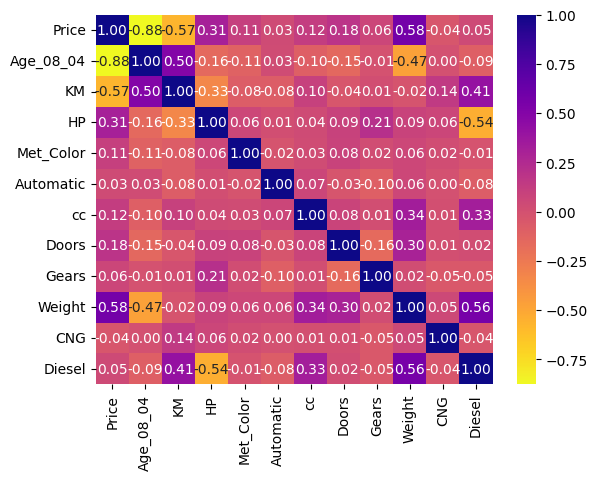

In [18]:
sns.heatmap(df.corr(), cmap='plasma_r', annot=True, fmt=".2f")

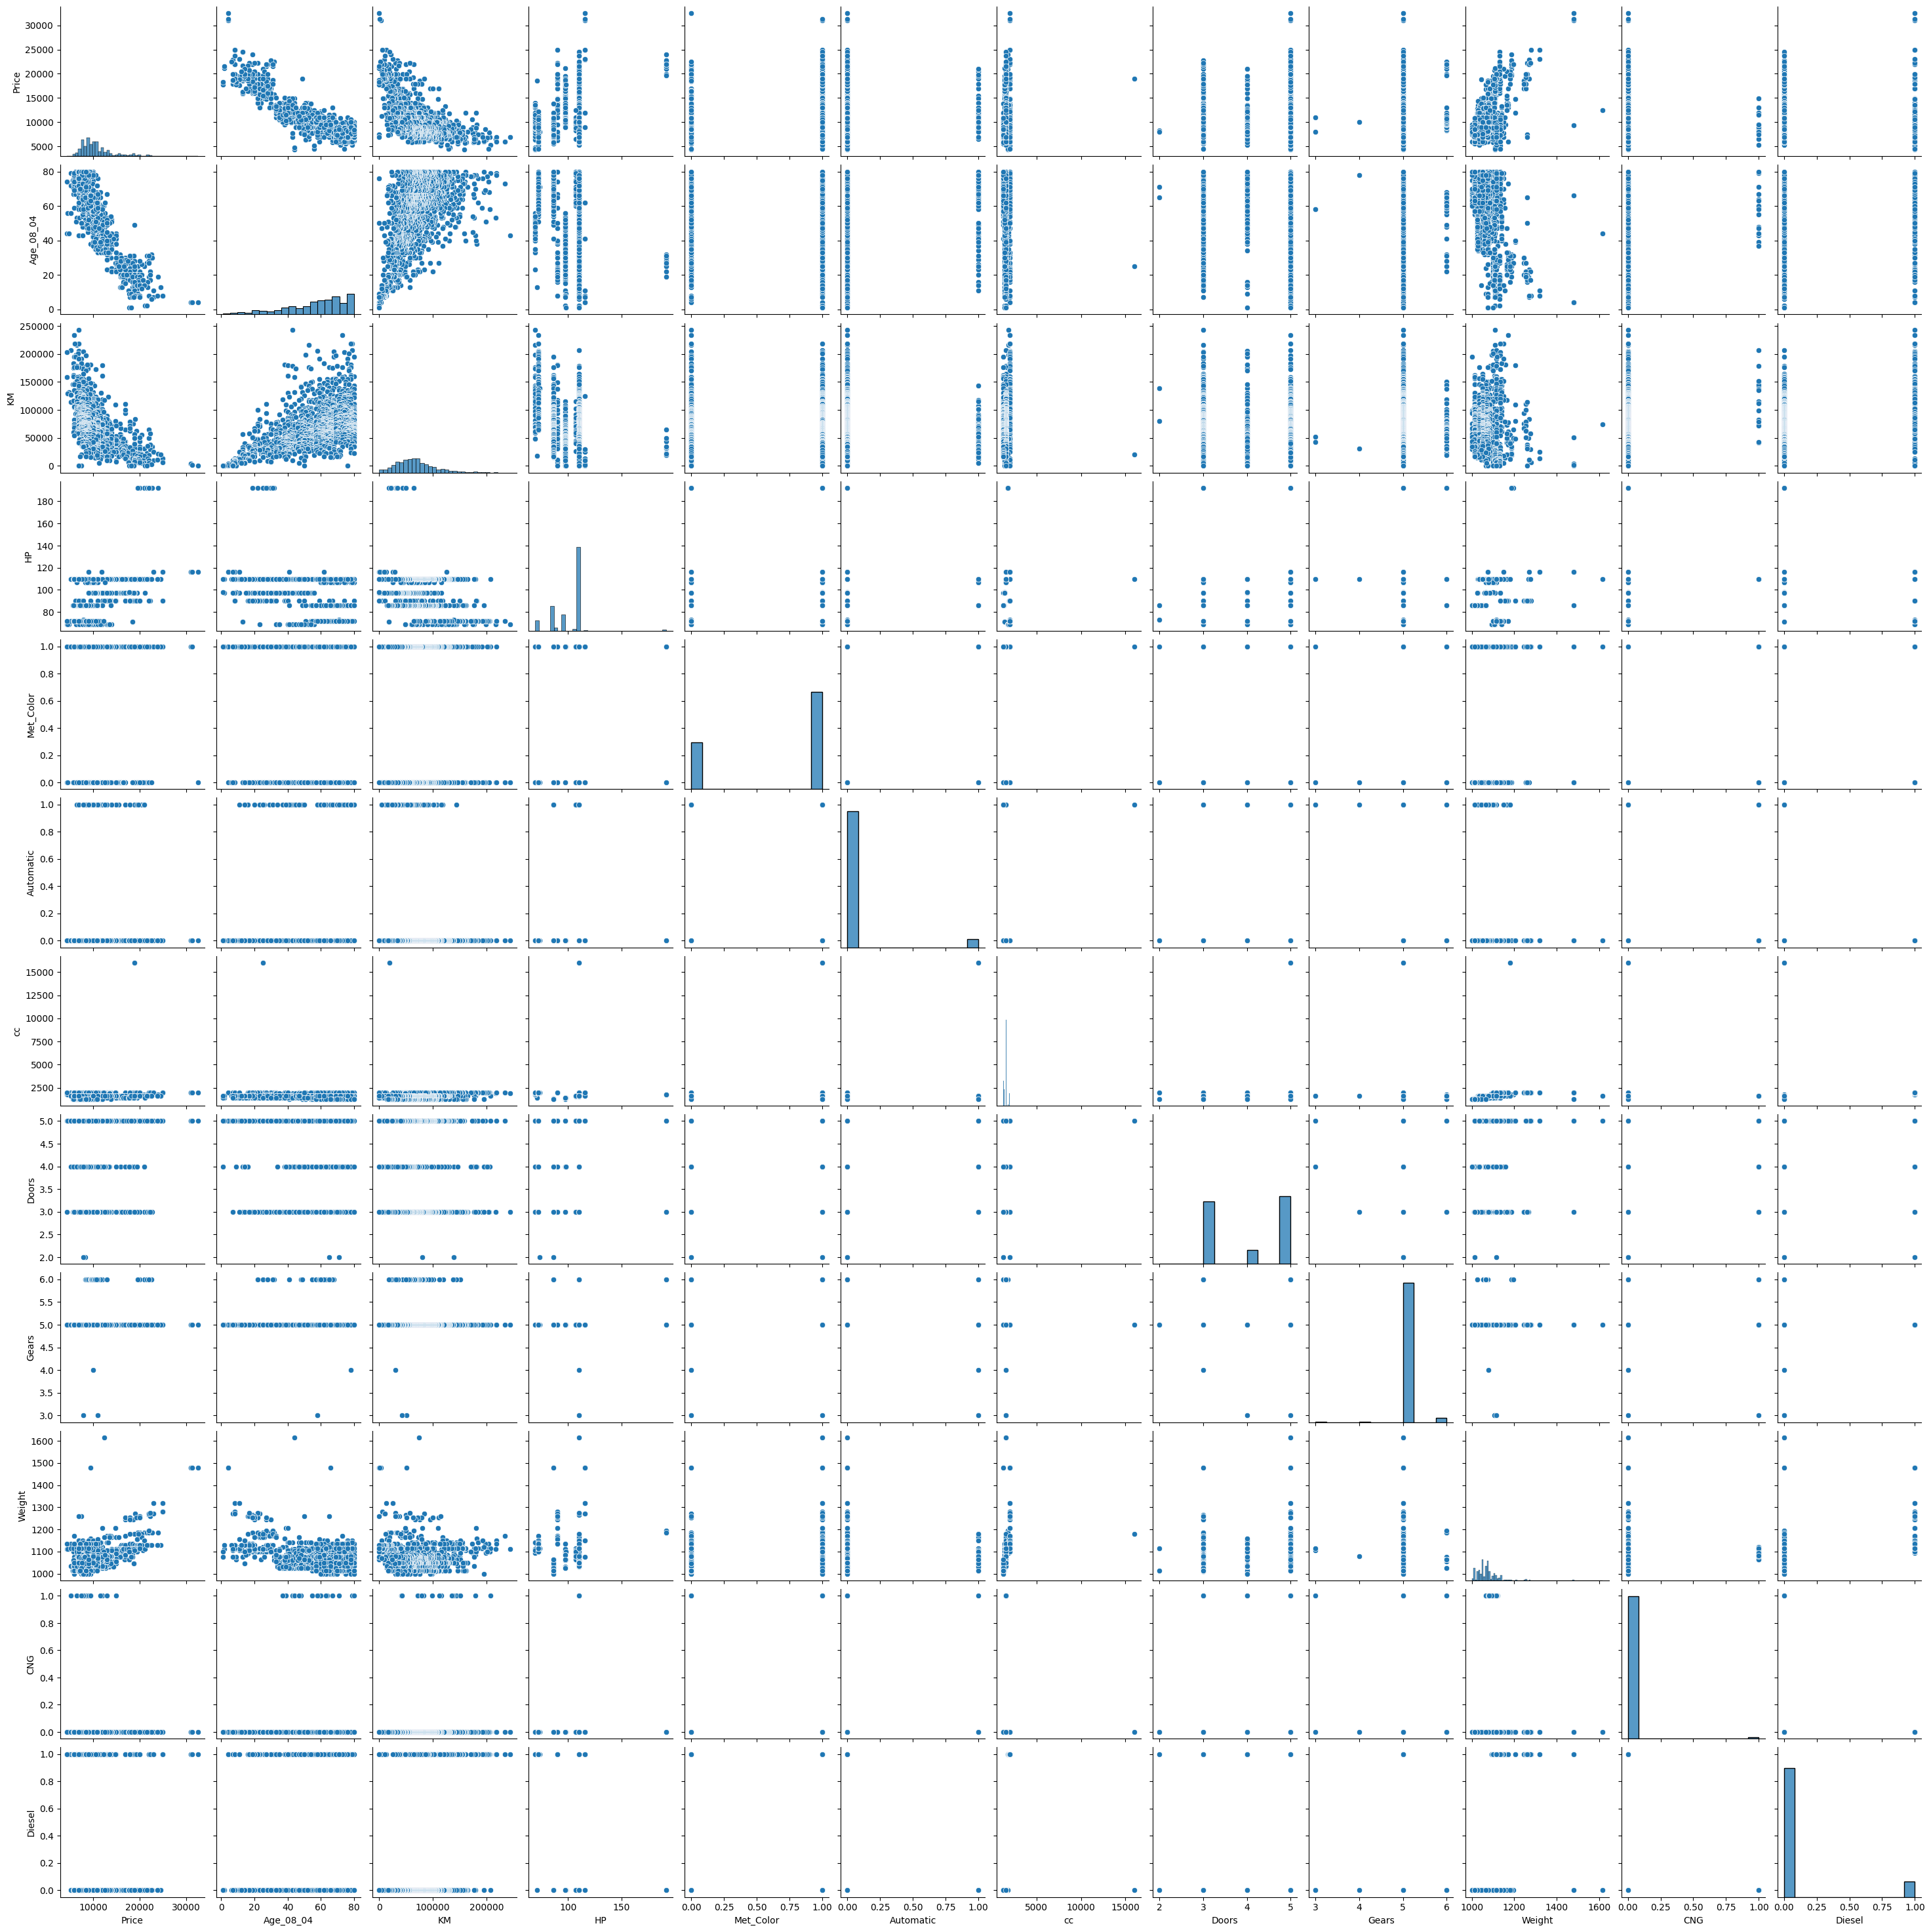

In [19]:
sns.pairplot(df)

## Preparing a model

In [20]:
model = smf.ols('Price~Age_08_04+KM+HP+Met_Color+Automatic+cc+Doors+Gears+Weight+CNG+Diesel',data=df).fit()

In [21]:
model.params

Intercept   -8620.557496
Age_08_04    -123.794678
KM             -0.017402
HP             23.292524
Met_Color      23.937437
Automatic     303.963830
cc             -0.052669
Doors         -30.813998
Gears         625.495632
Weight         20.712647
CNG         -1147.709052
Diesel       -608.486043
dtype: float64

In [22]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.831850
Age_08_04   -46.997388
KM          -13.049745
HP            6.514398
Met_Color     0.314475
Automatic     1.888339
cc           -0.572141
Doors        -0.751651
Gears         3.159010
Weight       16.989093
CNG          -3.389452
Diesel       -2.584226
dtype: float64 
 Intercept     6.774083e-09
Age_08_04    8.231152e-292
KM            7.580179e-37
HP            1.009875e-10
Met_Color     7.532064e-01
Automatic     5.918366e-02
cc            5.673170e-01
Doors         4.523853e-01
Gears         1.616354e-03
Weight        4.411483e-59
CNG           7.194795e-04
Diesel        9.858635e-03
dtype: float64


In [23]:
(model.rsquared,model.rsquared_adj)

(0.8637743224462988, 0.8627212778552301)

# Simple Linear Regression Models

In [24]:
# here p value should be less than 0.05
# from above model we can see p values of Met_Color,Automatic,cc and Doors are higher than 0.05
# so we need to find the impecting variable

In [25]:
ml_MC=smf.ols('Price~Met_Color',data = df).fit()
#t and p-Values
print(ml_MC.tvalues, '\n', ml_MC.pvalues)

Intercept    61.187447
Met_Color     4.097124
dtype: float64 
 Intercept    0.000000
Met_Color    0.000044
dtype: float64


In [26]:
ml_Auto=smf.ols('Price~Automatic',data = df).fit()
#t and p-Values
print(ml_Auto.tvalues, '\n', ml_Auto.pvalues)

Intercept    109.078463
Automatic      1.285065
dtype: float64 
 Intercept    0.000000
Automatic    0.198977
dtype: float64


In [27]:
ml_CC=smf.ols('Price~cc',data = df).fit()
#t and p-Values
print(ml_CC.tvalues, '\n', ml_CC.pvalues)

Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [28]:
ml_D=smf.ols('Price~Doors',data = df).fit()
#t and p-Values
print(ml_D.tvalues, '\n', ml_D.pvalues)

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [29]:
#here we can see that only Automatic data p value is higher than 0.05 s0
#the Automatic data is impecting one

In [30]:
rsq_Age = smf.ols("Age_08_04~KM+HP+Met_Color+Automatic+cc+Doors+Gears+Weight+CNG+Diesel",data=df).fit().rsquared
vif_Age = 1/(1-rsq_Age)
rsq_Km = smf.ols("KM~Age_08_04+HP+Met_Color+Automatic+cc+Doors+Gears+Weight+CNG+Diesel",data=df).fit().rsquared
vif_Km = 1/(1-rsq_Km)
rsq_Hp = smf.ols("HP~Age_08_04+KM+Met_Color+Automatic+cc+Doors+Gears+Weight+CNG+Diesel",data=df).fit().rsquared
vif_Hp = 1/(1-rsq_Hp)
rsq_Met_Color = smf.ols("Met_Color~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+CNG+Diesel",data=df).fit().rsquared
vif_Met_Color = 1/(1-rsq_Met_Color)
rsq_Automatic = smf.ols("Automatic~Age_08_04+KM+HP+Met_Color+cc+Doors+Gears+Weight+CNG+Diesel",data=df).fit().rsquared
vif_Automatic = 1/(1-rsq_Automatic)
rsq_CC = smf.ols("cc~Age_08_04+KM+HP+Met_Color+Automatic+Doors+Gears+Weight+CNG+Diesel",data=df).fit().rsquared
vif_CC = 1/(1-rsq_CC)
rsq_Doors = smf.ols("Doors~Age_08_04+KM+HP+Met_Color+Automatic+cc+Gears+Weight+CNG+Diesel",data=df).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)
rsq_Gears = smf.ols("Gears~Age_08_04+KM+HP+Met_Color+Automatic+cc+Doors+Weight+CNG+Diesel",data=df).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)
rsq_weight = smf.ols("Weight~Age_08_04+KM+HP+Met_Color+Automatic+cc+Doors+Gears+CNG+Diesel",data=df).fit().rsquared
vif_weight = 1/(1-rsq_weight)
rsq_CNG = smf.ols("CNG~Age_08_04+KM+HP+Met_Color+Automatic+cc+Doors+Gears+Weight+Diesel",data=df).fit().rsquared
vif_CNG = 1/(1-rsq_CNG)
rsq_Diesel = smf.ols("Diesel~Age_08_04+KM+HP+Met_Color+Automatic+cc+Doors+Gears+Weight+CNG",data=df).fit().rsquared
vif_Diesel = 1/(1-rsq_Diesel)


# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','Met_Color','Automatic','cc','Doors','Gears','Weight','CNG','Diesel'],'VIF':[vif_Age,vif_Km,vif_Hp,vif_Met_Color,vif_Automatic,vif_CC,vif_Doors,vif_Gears,vif_weight,vif_CNG,vif_Diesel]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age_08_04,1.917802
1,KM,2.004872
2,HP,2.301580
3,Met_Color,1.020965
4,Automatic,1.094834
5,cc,1.224219
6,Doors,1.223438
7,Gears,1.118280
8,Weight,3.255151
9,CNG,1.077371


## Subset selection

In [31]:
  # AIC : Akaike Information Criterion
# used to find the best model, lower the AIC better the model

In [32]:
# here Automatic is the effective one because its p value is greater than 0.05

In [33]:
# with Met_Color without Automatic,cc and Doors
model = smf.ols('Price~Age_08_04+KM+HP+Met_Color+Gears+Weight+CNG+Diesel',data=df).fit()
f'AIC:{model.aic}, rsq_ms:{rsq_Met_Color}'

'AIC:24741.937268025627, rsq_ms:0.020534338792244644'

In [34]:
# with Automatic , by dropping Met_Color,cc and Doors
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+Gears+Weight+CNG+Diesel',data=df).fit()
f'AIC:{model.aic}, rsq_adm:{rsq_Automatic}'

'AIC:24738.24383034157, rsq_adm:0.08661971639942911'

In [35]:
# with cc without Met_Color,Automatic and Doors
model = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Weight+CNG+Diesel',data=df).fit()
f'AIC:{model.aic}, rsq_adm:{rsq_CC}'

'AIC:24741.83126070076, rsq_adm:0.1831527790134977'

In [36]:
# with Doors without Met_Color,Automatic and cc
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+CNG+Diesel',data=df).fit()
f'AIC:{model.aic}, rsq_adm:{rsq_Doors}'

'AIC:24741.063988941067, rsq_adm:0.18263135812128106'

In [37]:
# model without Automatic
model = smf.ols('Price~Age_08_04+KM+HP+Met_Color+cc+Doors+Gears+Weight+CNG+Diesel',data=df).fit()
rsq=model.rsquared
f'AIC:{model.aic}, rsq:{rsq}'

'AIC:24744.846312516434, rsq:0.8634329612271734'

In [38]:
# first or we can say basic model
model = smf.ols('Price~Age_08_04+KM+HP+Met_Color+Automatic+cc+Doors+Gears+Weight+CNG+Diesel',data=df).fit()
rsq=model.rsquared
f'AIC:{model.aic}, rsq:{rsq}'

'AIC:24743.25491453684, rsq:0.8637743224462988'

# here we can see that as removing either one of them is effecting the r squared value
# so we can say all 4 are not removable simultaniously
## after removing Automatic only we can see that there is not any significant change in the rsquared value but AIC is lower in the 'with automatic' model so that model is better
# Residual Analysis¶

In [39]:
# Residuals= actual values - predicted values
# residual analysis gives the values of residuals

In [40]:
# Q-Q plot: Quantile Quantile plot
# it plots the residuals and gives the non linearity of the data points
# which help us to visualize residuals

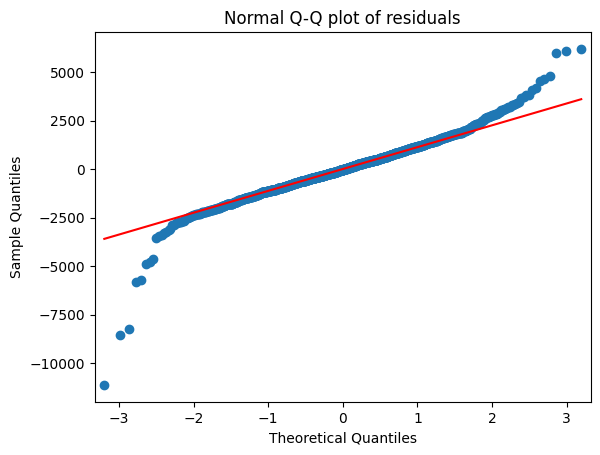

In [41]:
import statsmodels.api as sm

model=smf.ols('Price~Age_08_04+KM+HP+Met_Color+Automatic+cc+Doors+Gears+Weight+CNG+Diesel',data=df).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [42]:
list(np.where(model.resid<5000))

[array([   0,    1,    2, ..., 1432, 1433, 1434])]

In [43]:
list(np.where(model.resid<-5000))

[array([190, 191, 220, 600, 959])]

# Residual plot for Homoscedasticity

In [44]:
# homoscedasticity means that the variability of the response variable is similar across different values of the predictor variables.
# means variance of the errors or residuals of the model is constant across all levels.

In [46]:
model=smf.ols('Price~Age_08_04+KM+HP+Met_Color+Automatic+cc+Doors+Gears+Weight+CNG+Diesel',data=df).fit()

In [45]:
# defining the function
def get_standardized_values( vals ):
    return (vals-vals.mean())/vals.std()

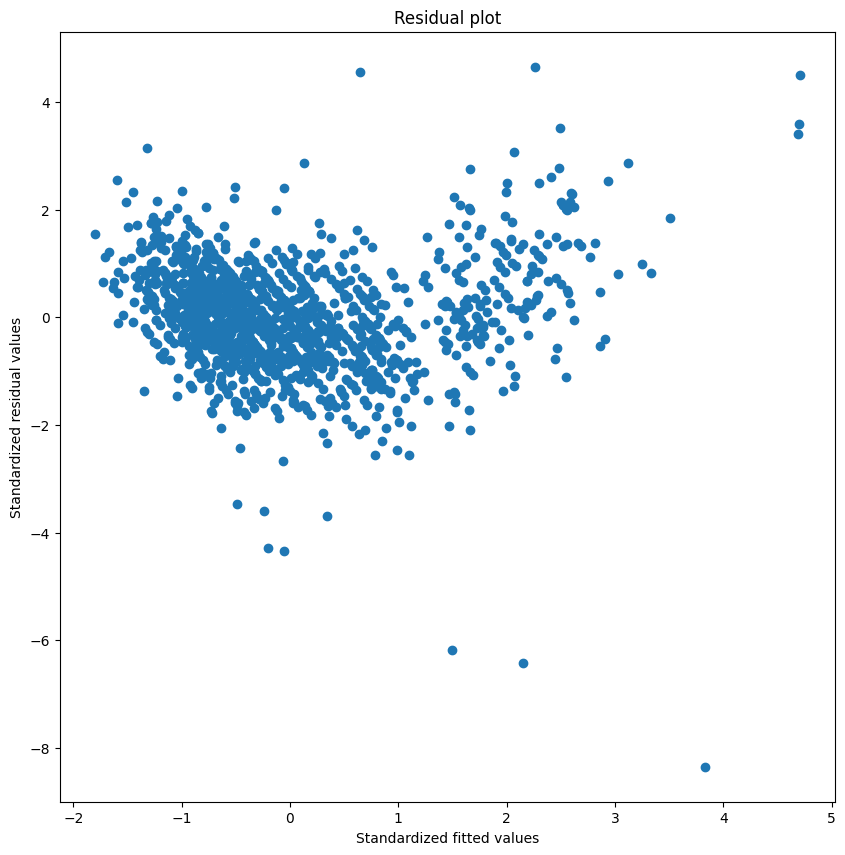

In [47]:
# plot between fitted values and residual values
plt.figure(figsize=(10,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [48]:
# here not any pattern in residual plot so there is a good chance of model is linearly fitted

Residual vs Regressors
## used to see residual values with each indipendent varib

In [49]:
# used to see residual values with each indipendent varible as there is any pattern or not
# if there is any pattern then model is not linear

In [50]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight', 'CNG', 'Diesel'],
      dtype='object')

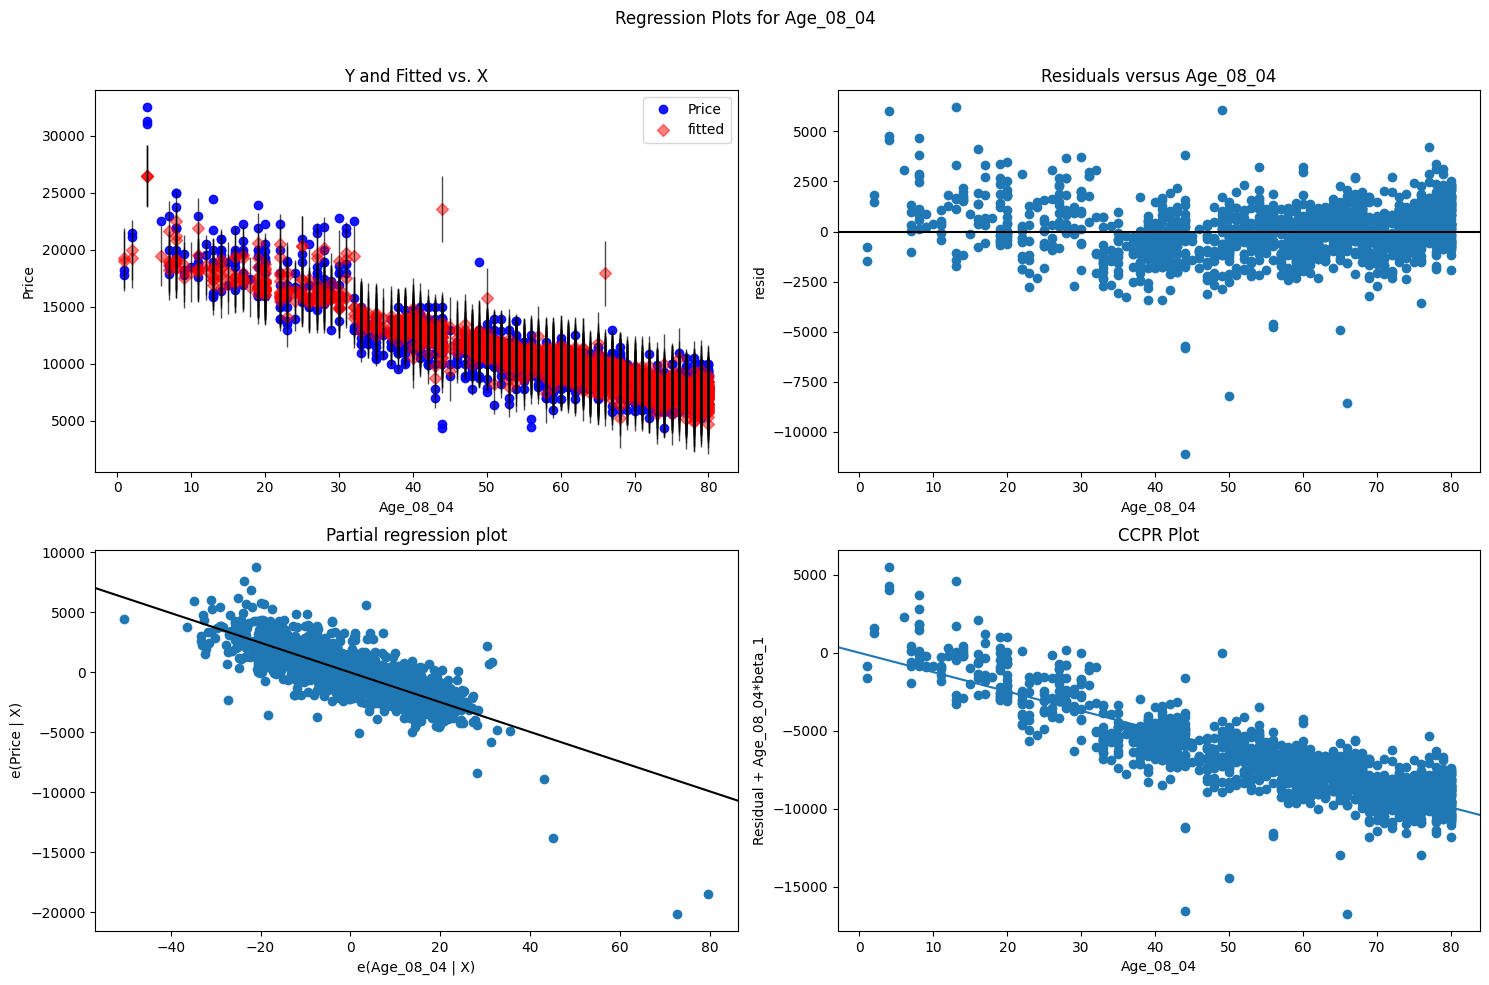

In [51]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

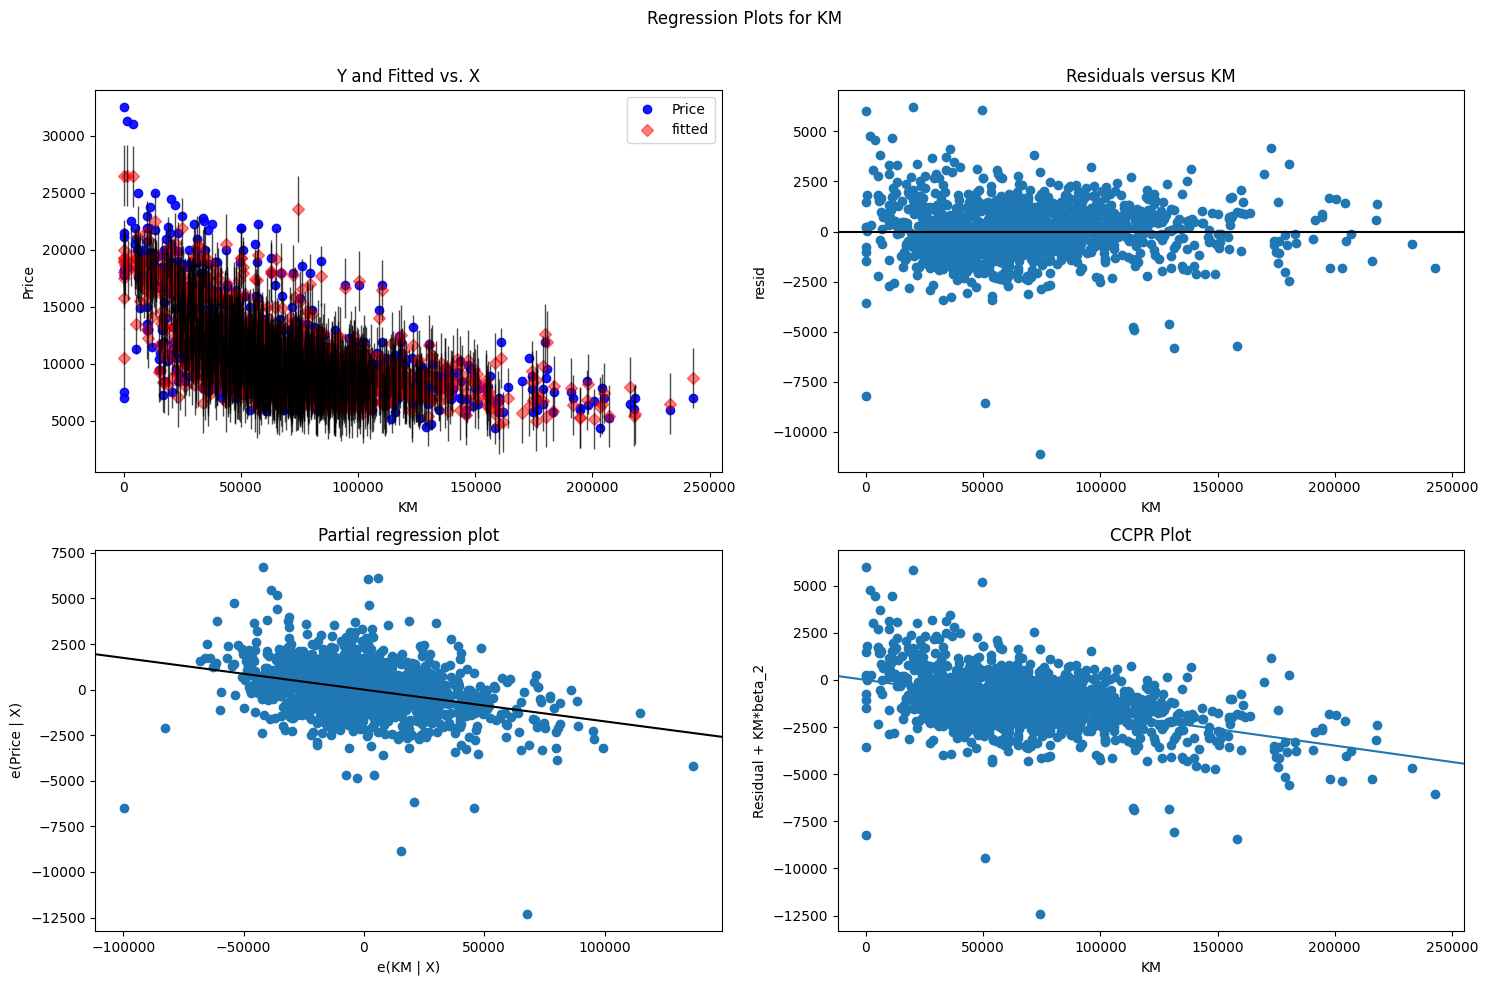

In [52]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

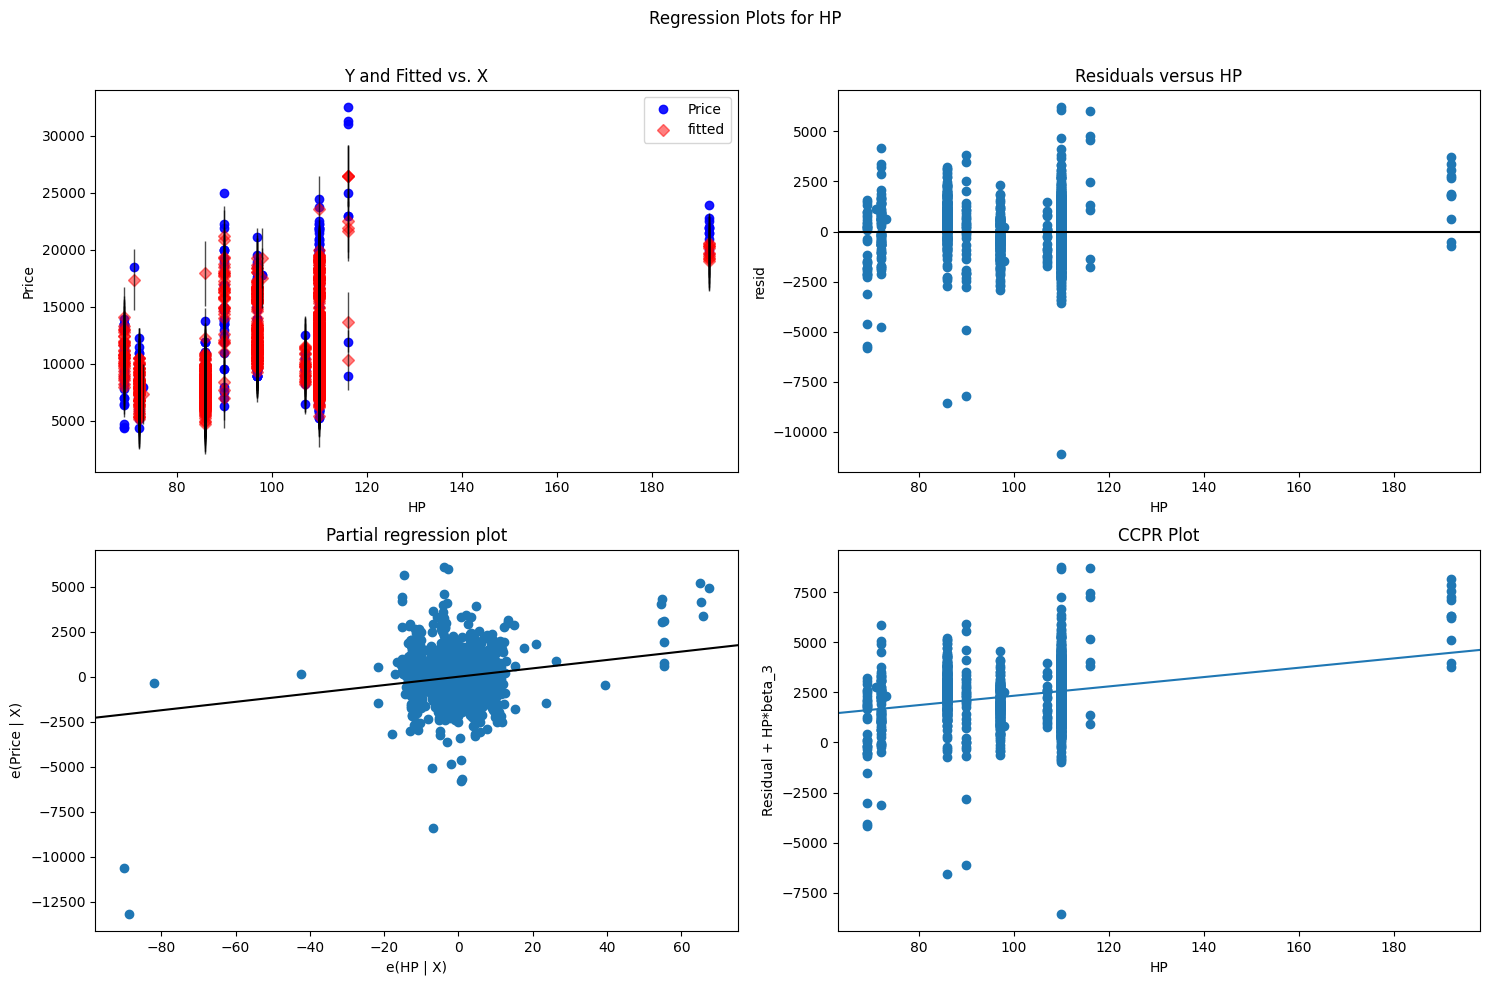

In [53]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

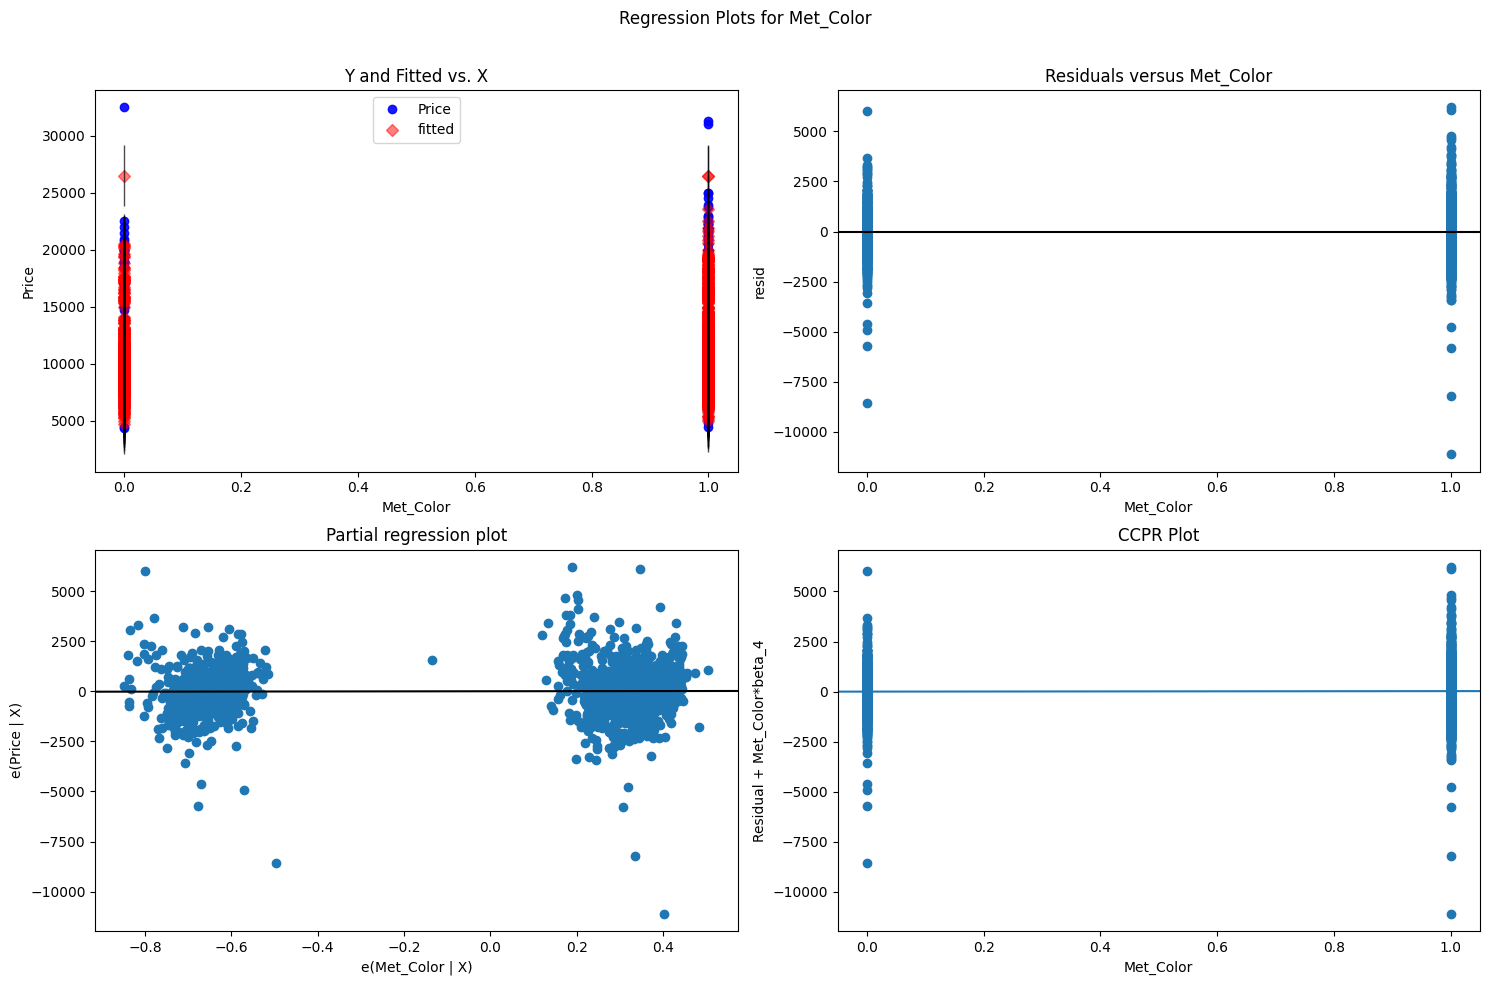

In [54]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Met_Color',fig=fig)
plt.show()

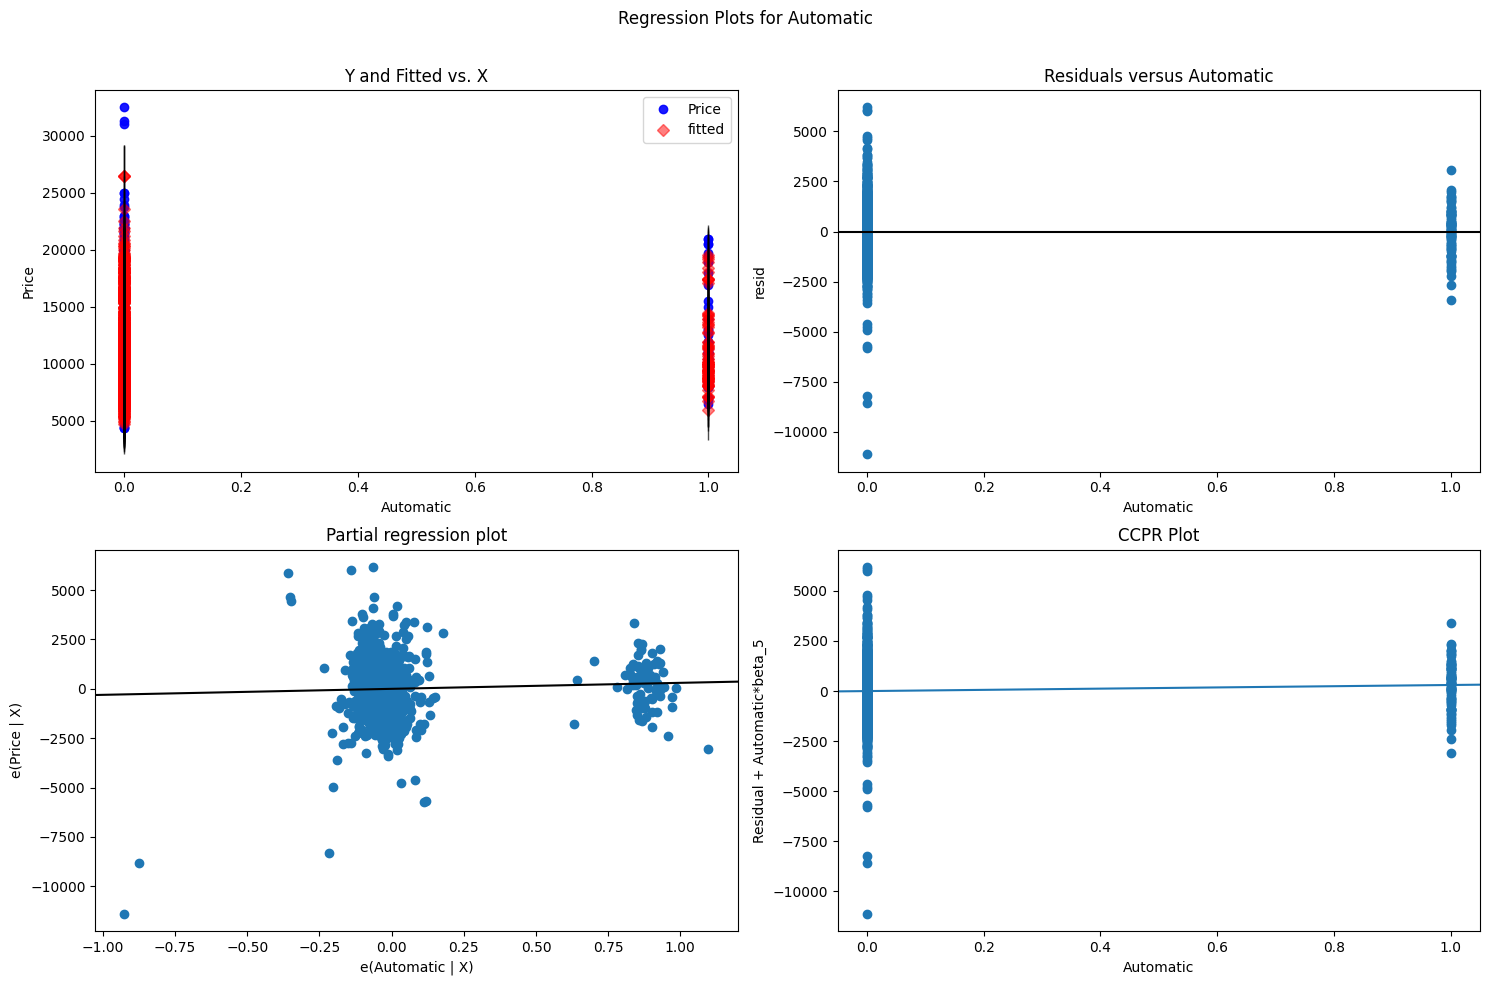

In [55]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Automatic',fig=fig)
plt.show()

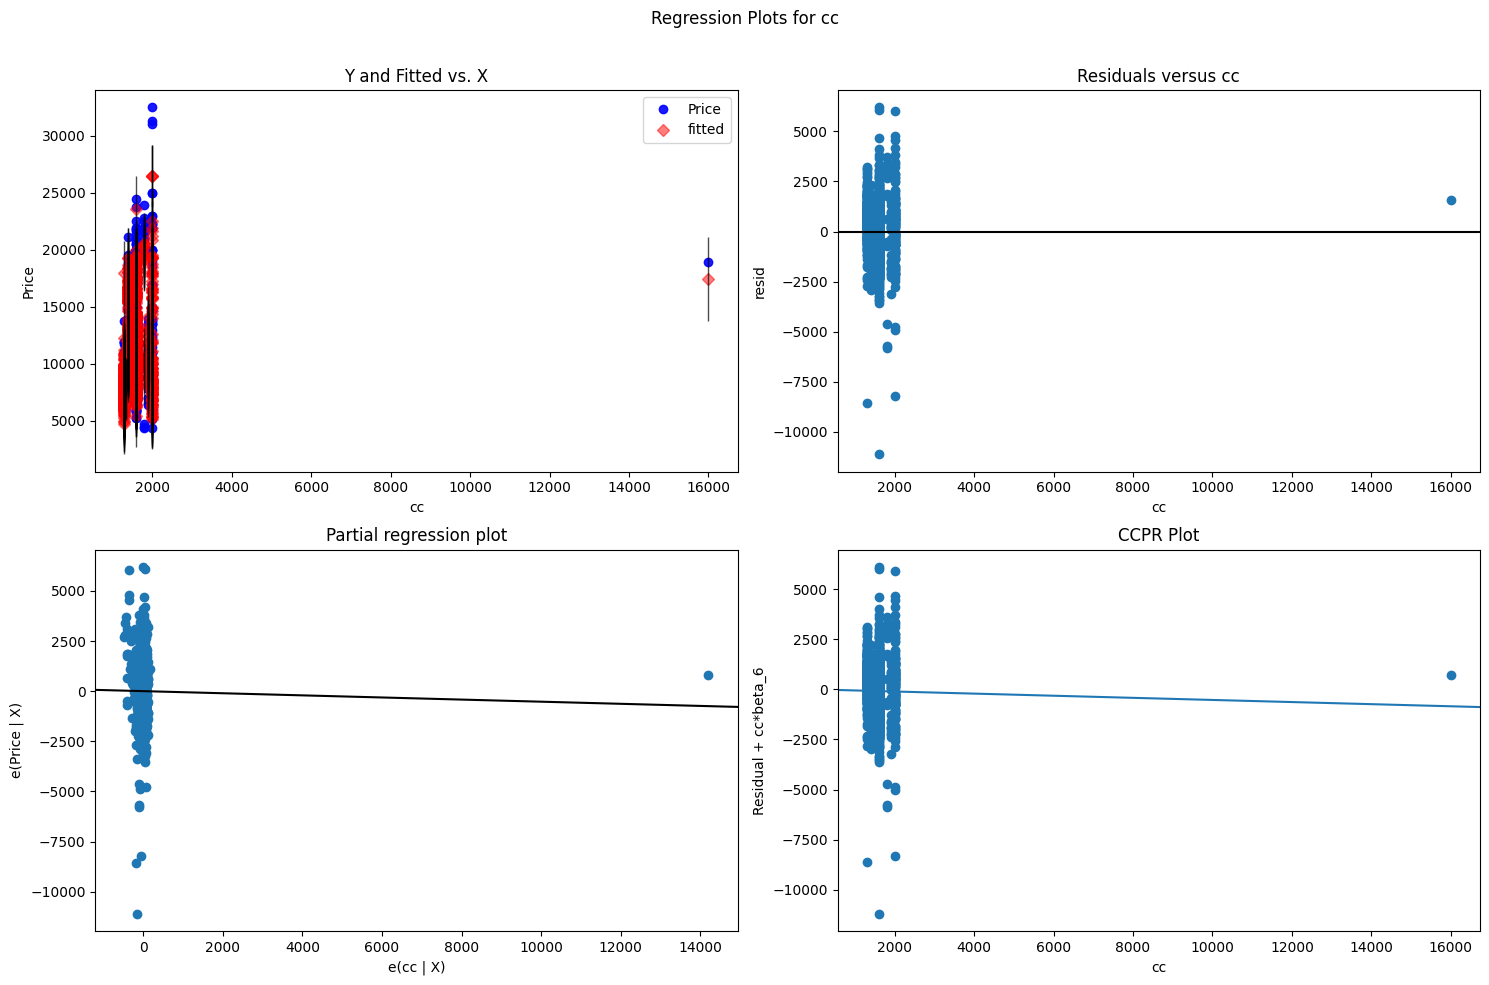

In [56]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

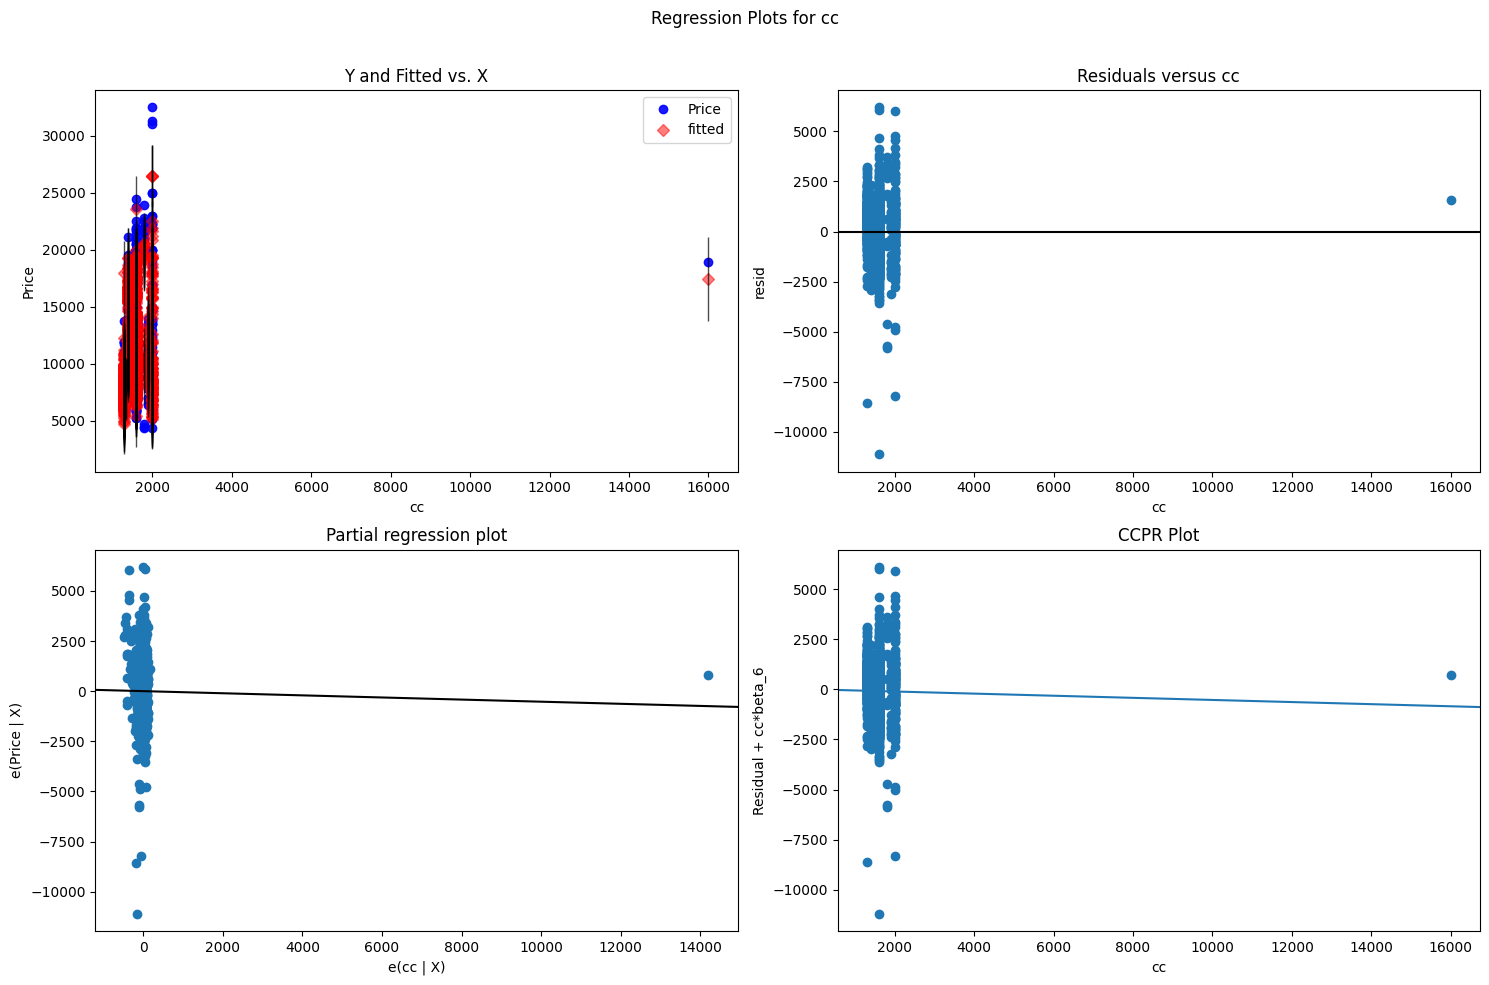

In [57]:
    fig=plt.figure(figsize=(15,10))
    fig = sm.graphics.plot_regress_exog(model,'cc',fig=fig)
    plt.show()

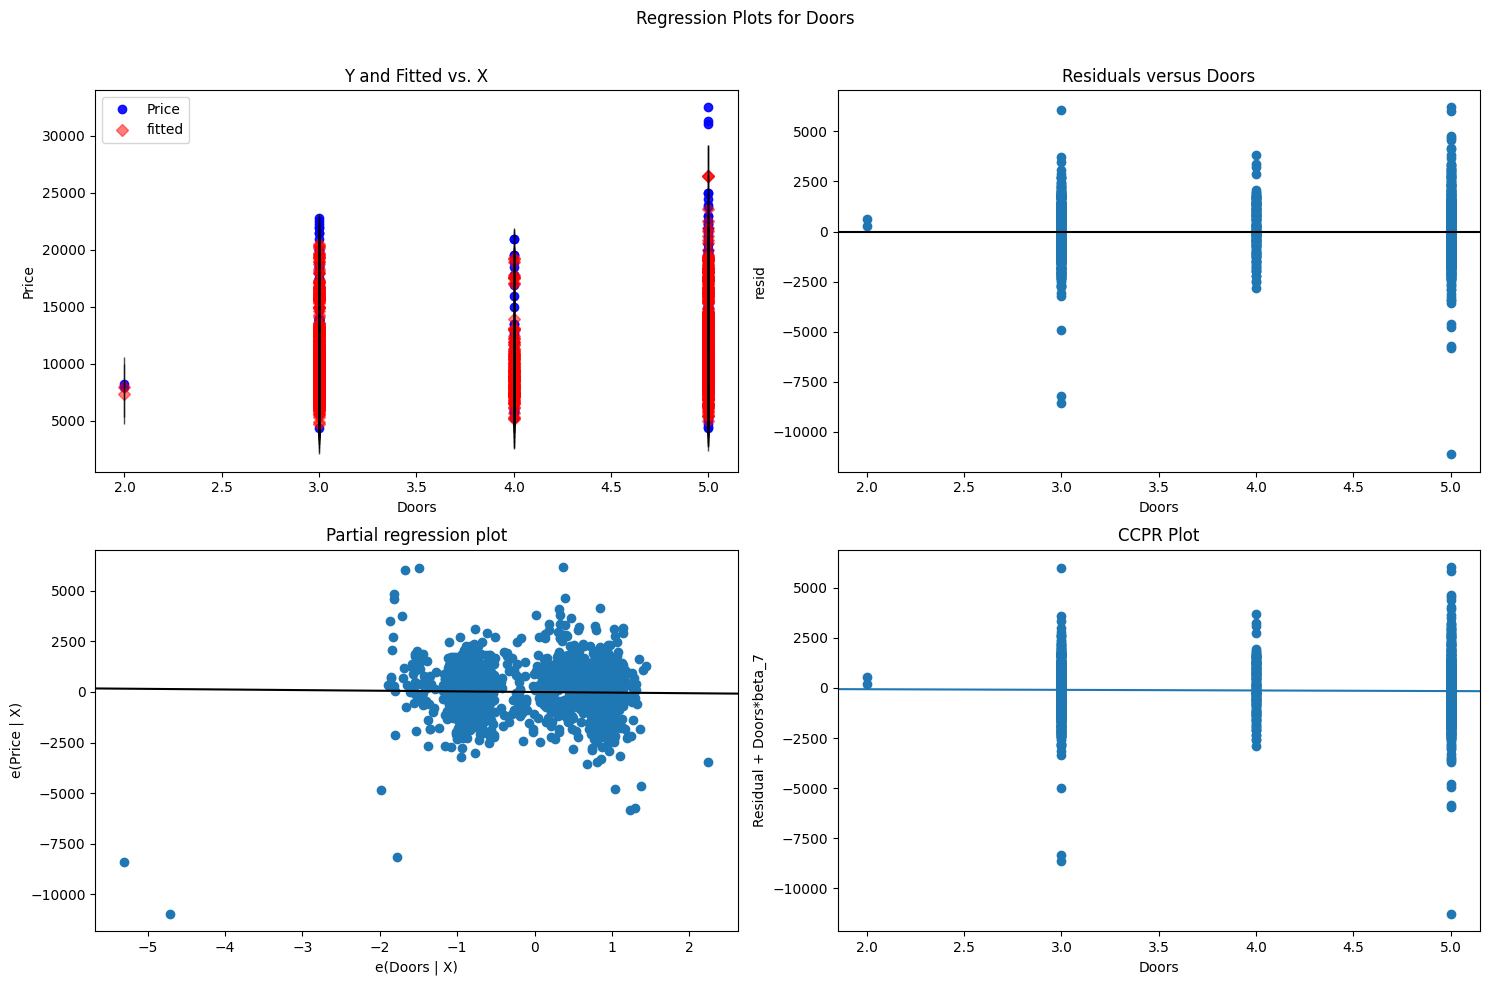

In [58]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

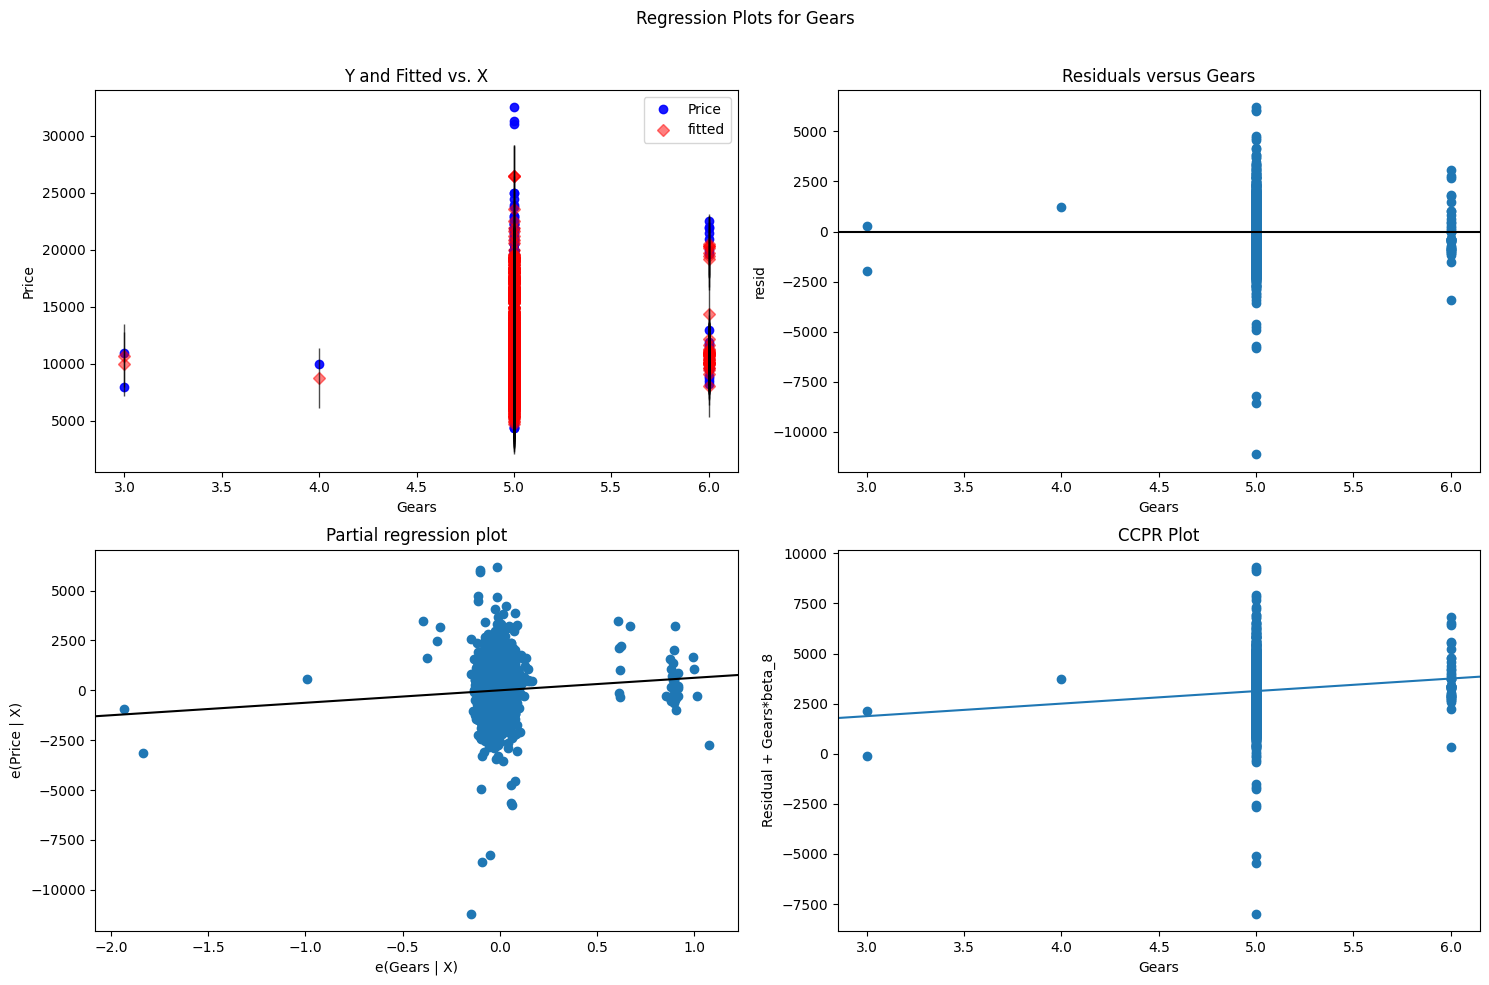

In [59]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

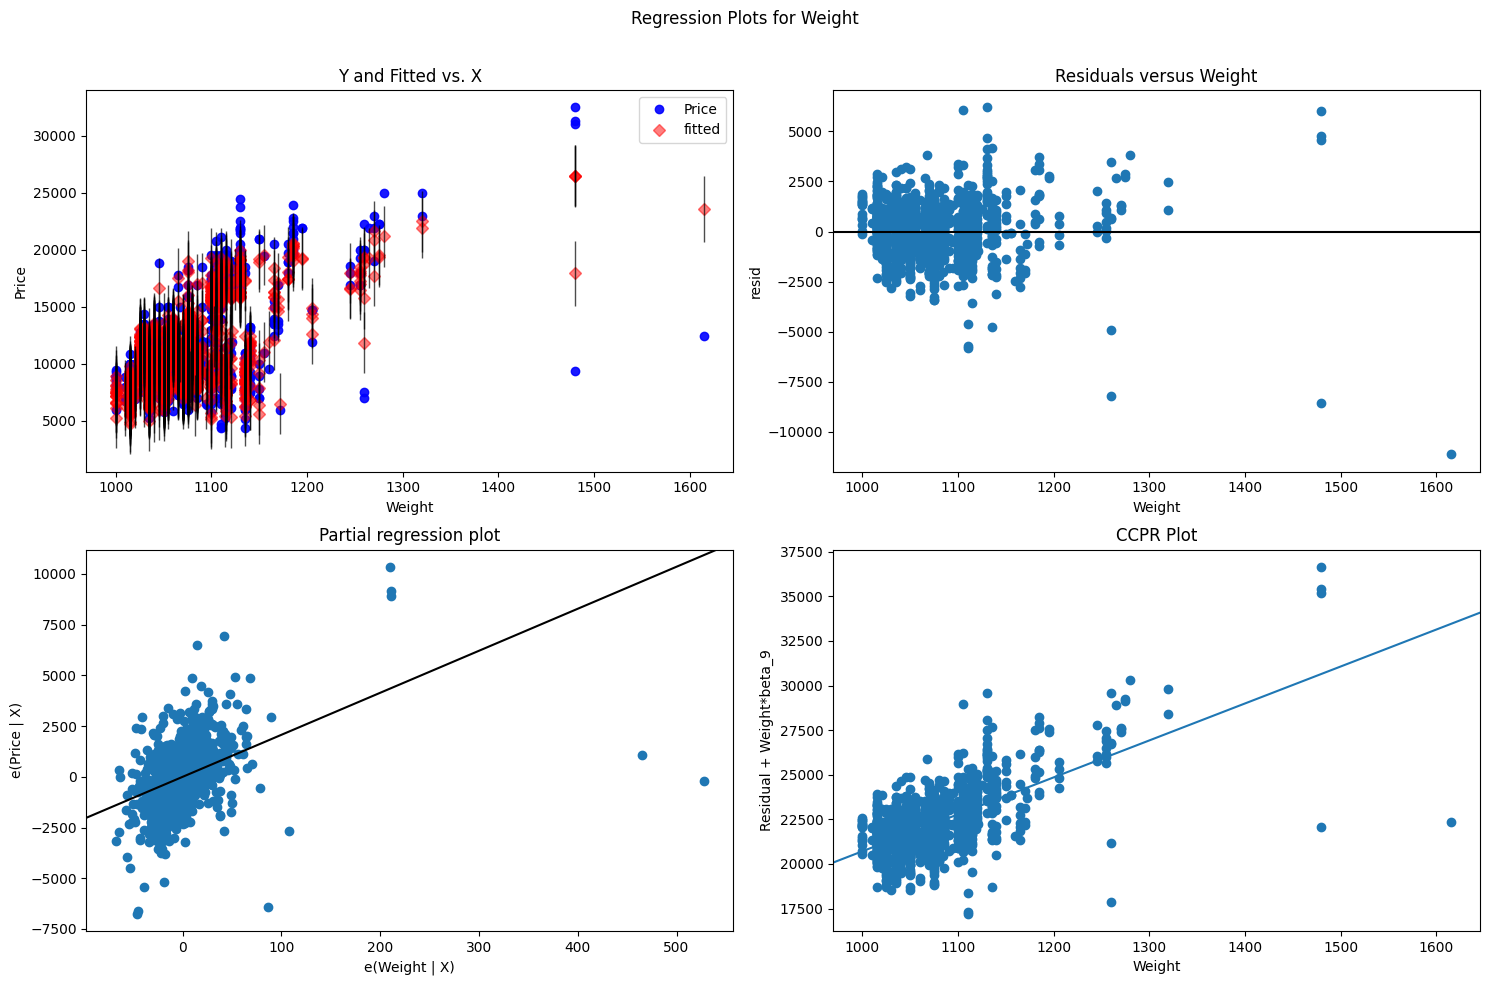

In [60]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

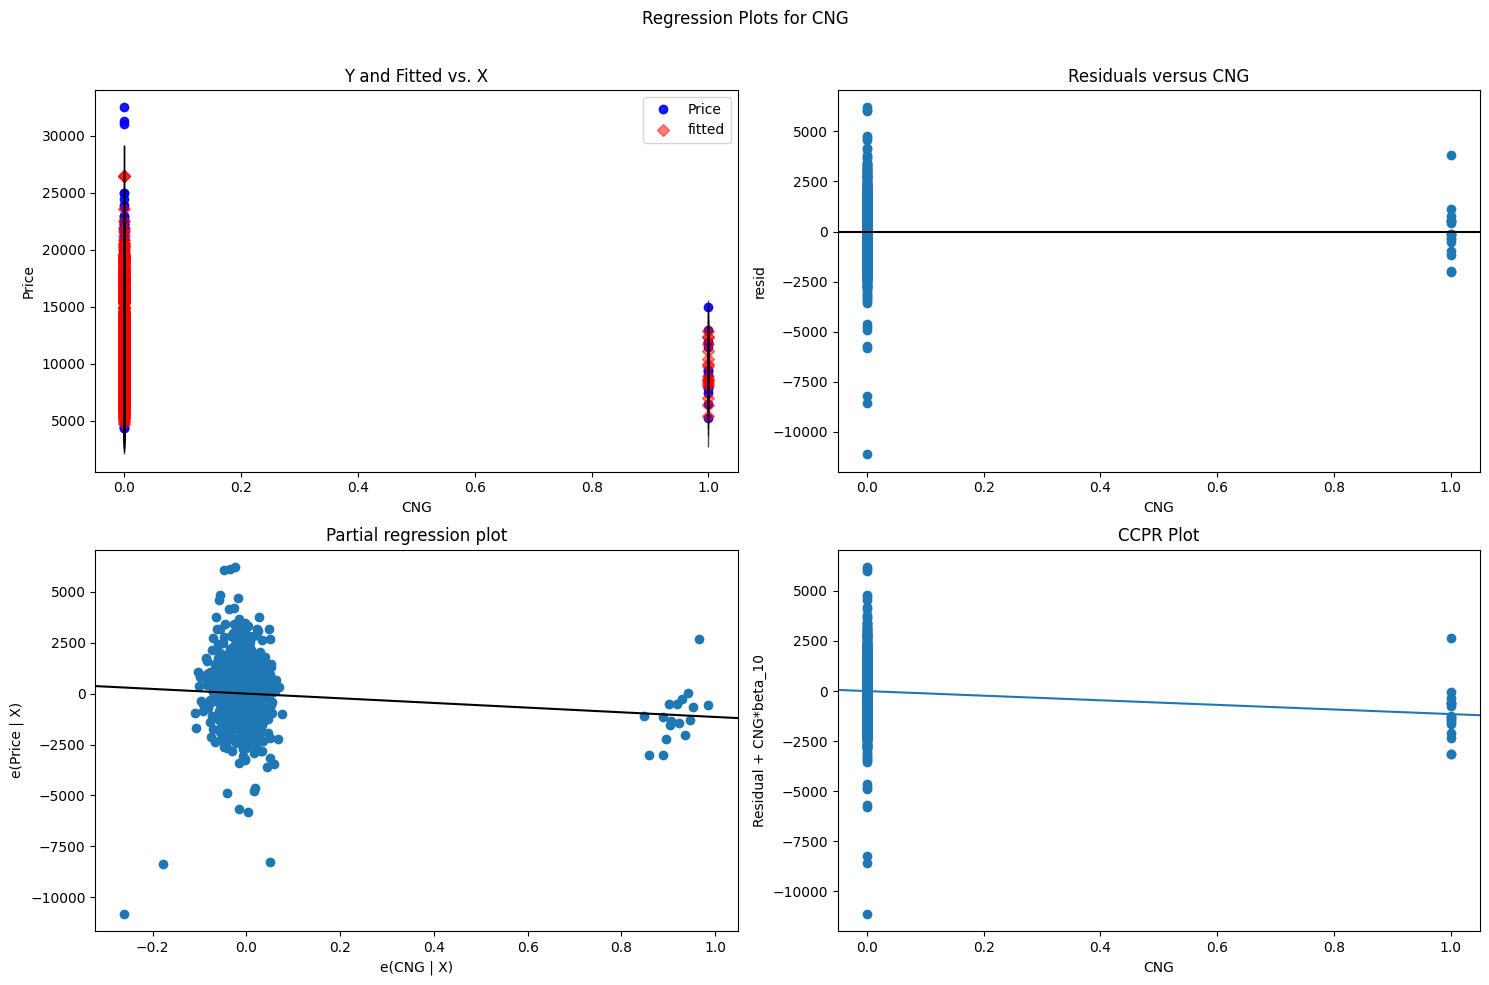

In [61]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'CNG',fig=fig)
plt.show()

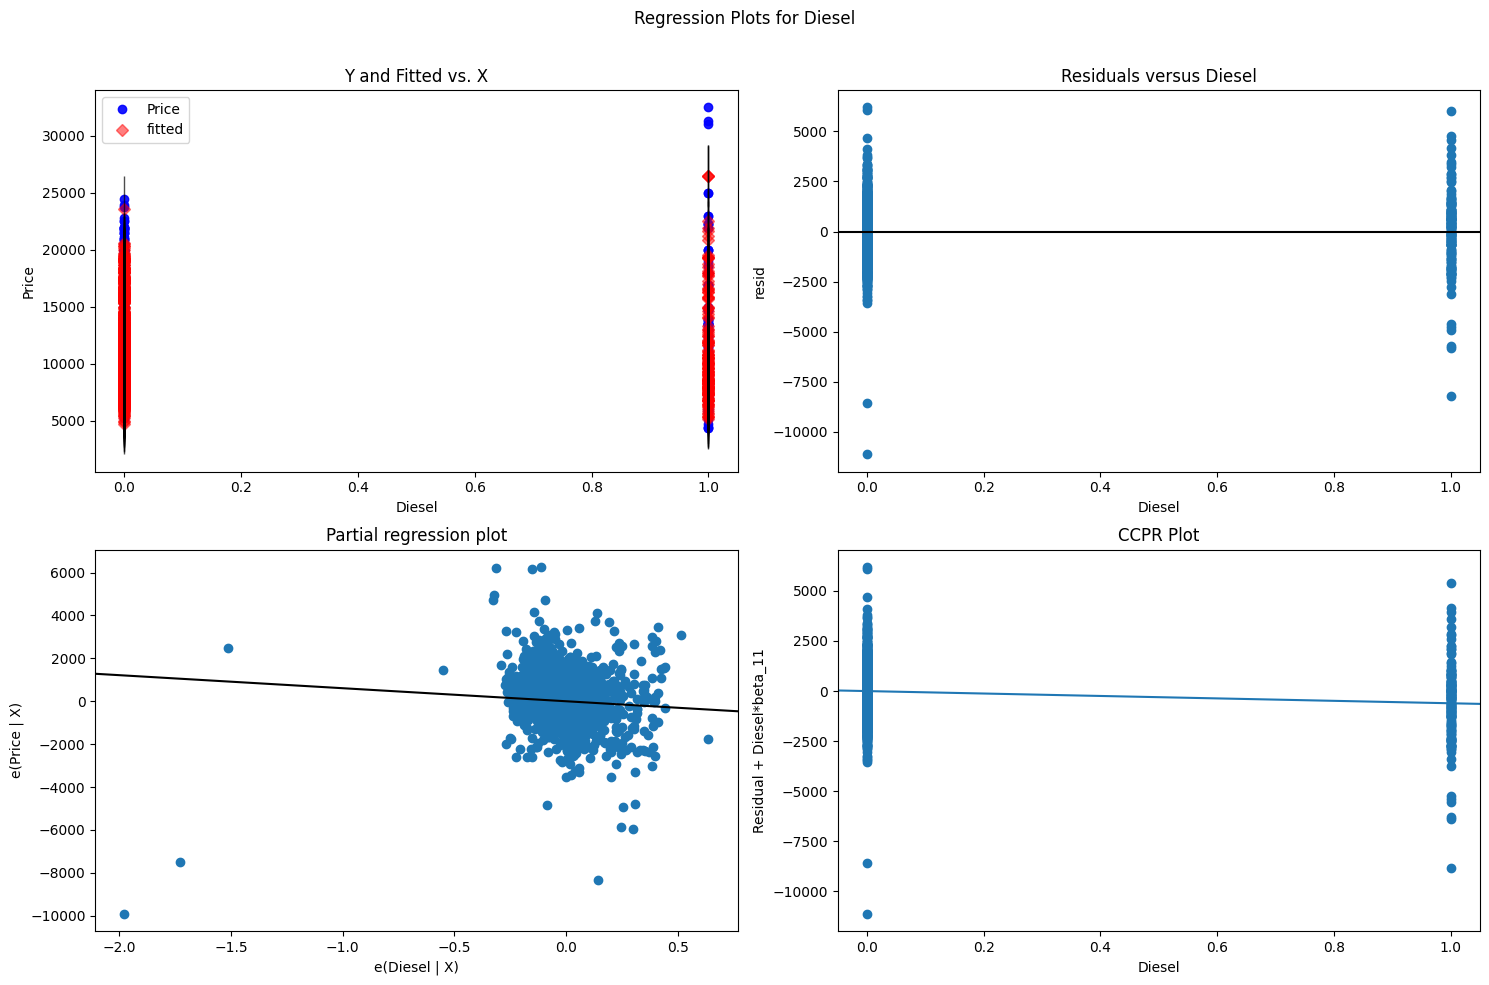

In [62]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Diesel',fig=fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Influencers/Outliers
## Cook's distance

In [64]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([4.32142315e-03, 2.20265082e-03, 3.03675143e-03, ...,
       1.71386522e-05, 4.67290444e-04, 7.96727039e-03])

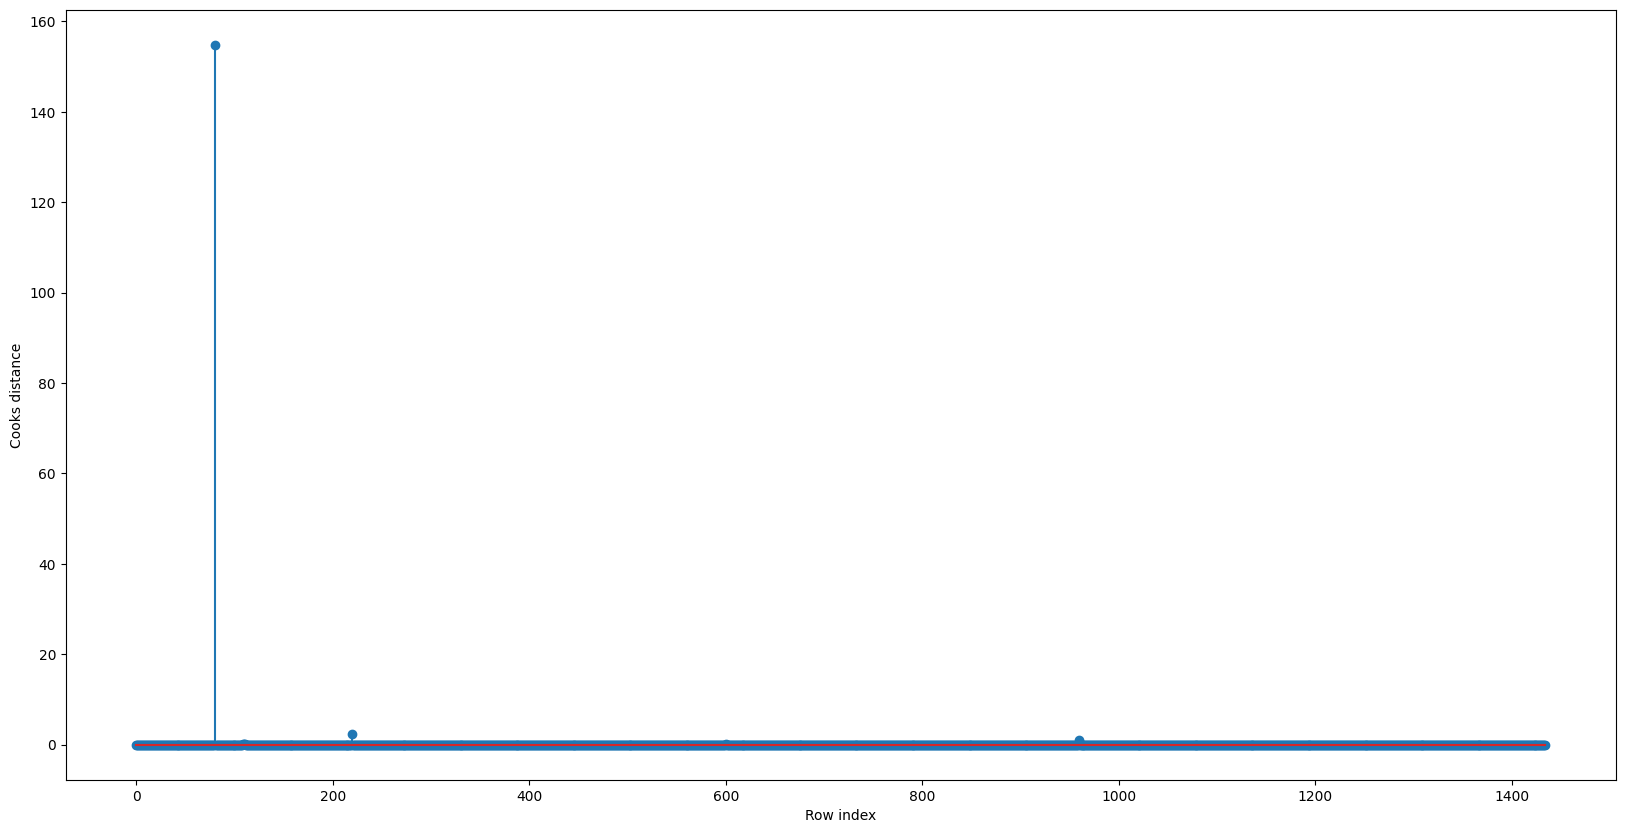

In [65]:
# now lets plot the values using stem plot for visualising influencers
fig = plt.figure(figsize=(20,10))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [66]:
# the cook's distance should be less than 0.5
# more than 0.5 shows high influencer/outline point and greater than 1 then its extreme
(np.argmax(c),np.max(c))

(80, 154.8445190621932)

## inference
According to the output (80, 154.84451906233474), the maximum value in the array c is approximately 154.84451906233474, and it is located at index 80.

This information suggests that observation 80 in the dataset has the highest Cook's distance, indicating that it potentially has a significant influence on the regression model.

# High influence points

In [67]:
df.shape

(1435, 12)

In [68]:
from sklearn.preprocessing import StandardScaler
# Standardization
a = StandardScaler()
a.fit(df)
df_standardized = a.transform(df)
df1=pd.DataFrame(df_standardized)

In [69]:
k = df1.shape[1] # k= no. of variables
n = df1.shape[0] # n= no. of datapoints
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.02717770034843206

In [70]:
# so here we can see that 0.027

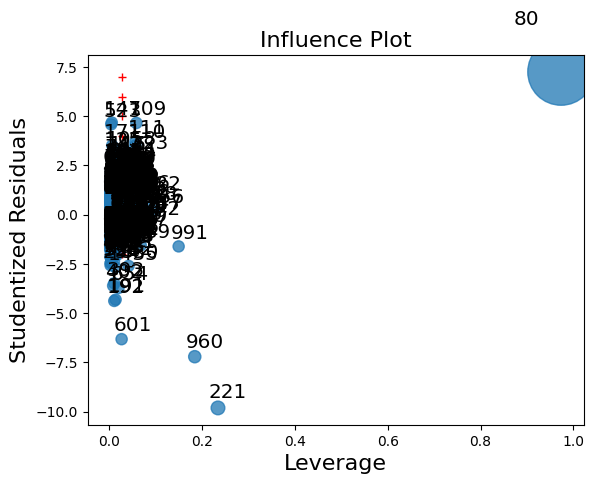

In [71]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [72]:
# from leverage cutoff and cooks distance we can see that there are number of points which exceeds the leverage cutoff bt we cant remove these high number of essential data points
# so we would take a manual cutoff where actual outliers lies
#in graph we can see the 0.2 my be the point so
np.where(c> 0.2)

(array([ 80, 220, 959]),)

## inference
The output (array([ 80, 220, 959], dtype=int64),) indicates that the indices 80, 220, and 959 in the array c have values greater than 0.2.

These indices correspond to the observations in the dataset that have Cook's distances exceeding the threshold of 0.2, suggesting that these observations potentially have a significant influence on the regression model

# improving the model

In [73]:
df2=df.drop(df.index[[80,220,959]],axis=0).reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1432 non-null   int64
 1   Age_08_04  1432 non-null   int64
 2   KM         1432 non-null   int64
 3   HP         1432 non-null   int64
 4   Met_Color  1432 non-null   int64
 5   Automatic  1432 non-null   int64
 6   cc         1432 non-null   int64
 7   Doors      1432 non-null   int64
 8   Gears      1432 non-null   int64
 9   Weight     1432 non-null   int64
 10  CNG        1432 non-null   uint8
 11  Diesel     1432 non-null   uint8
dtypes: int64(10), uint8(2)
memory usage: 114.8 KB


# Building Final Model

In [74]:
model2=smf.ols('Price~Age_08_04+KM+HP+Met_Color+Automatic+cc+Doors+Gears+Weight+CNG+Diesel',data=df2).fit()

In [75]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     991.5
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:13:44   Log-Likelihood:                -12212.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1420   BIC:                         2.451e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.708e+04   1671.465    -10.217      0.000   -2.04e+04   -1.38e+04
Age_08_04   -112.7258      2.517    -44.777      0.000    -117.664    -107.787
KM            -0.0152      0.001    -12.275      0.000      -0.018      -0.013
HP            31.9327      5.789      5.517      0.000      20.578      43.288
Met_Color     45.5107     70.060      0.650      0.516     -91.921     182.942
Automatic    -76.3983    151.092     -0.506      0.613    -372.786     219.989
cc            -3.4481      0.516     -6.684      0.000      -4.460      -2.436
Doors       -148.2767     39.601     -3.744      0.000    -225.960     -70.594
Gears        412.9854    182.966      2.257      0.024      54.072     771.899
Weight        33.4421      1.472     22.716      0.000      30.554      36.330
CNG        -1532.3422    313.114     -4.894      0.000   -2146.557    -918.127
Diesel      -137.3624    443.656     -0.310      0.757   -1007.654     732.929
==============================================================================
Omnibus:                      159.490   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1148.650
Skew:                          -0.222   Prob(JB):                    3.75e-250
Kurtosis:                       7.365   Cond. No.                     4.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Table of R-squared of basic and final model

In [76]:
d2={"Models":['Basic Model','Final Model'],"R Squared":[model.rsquared,model2.rsquared]}
table=pd.DataFrame(d2)
print(table)

        Models  R Squared
0  Basic Model   0.863774
1  Final Model   0.884799


inference
The DataFrame displays two rows, each representing a model, with their corresponding R-squared values. The "Basic Model" has an R-squared value of approximately 0.863, and the "Final Model" has an R-squared value of approximately 0.884. This table provides a convenient summary of the models and their associated R-squared values.

# inference
The DataFrame displays two rows, each representing a model, with their corresponding R-squared values. The "Basic Model" has an R-squared value of approximately 0.863, and the "Final Model" has an R-squared value of approximately 0.884. This table provides a convenient summary of the models and their associated R-squared values.

# Model Prediction

In [77]:
# Model Prediction

In [78]:
new_df=pd.DataFrame({'Age_08_04':23,"KM":50000,"HP":90,"Met_Color":1,"Automatic":1,"cc":2000,"Doors":5,"Gears":4,"Weight":2004,"CNG":0,"Diesel":1},index=[0])
new_df

,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Gears,Weight,CNG,Diesel
0,23,50000,90,1,1,2000,5,4,2004,0,1


In [79]:
model2.predict(new_df)

0    43310.247721
dtype: float64

# **inference**
The output (0 43310.247721 dtype: float64) suggests that the predicted value for the target variable, based on the "new_df", is approximately 43310.247721. The predicted value is a single value represented as a float64 data type.